<a href="https://colab.research.google.com/github/DeepeshMadane/Ann_projects/blob/main/Studen_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Student_Marks.csv')

In [3]:
data.head(

)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [4]:
data.isnull().sum()

,0
number_courses,0
time_study,0
Marks,0


In [5]:
data.duplicated().sum()

0

In [6]:
import matplotlib.pyplot as plt


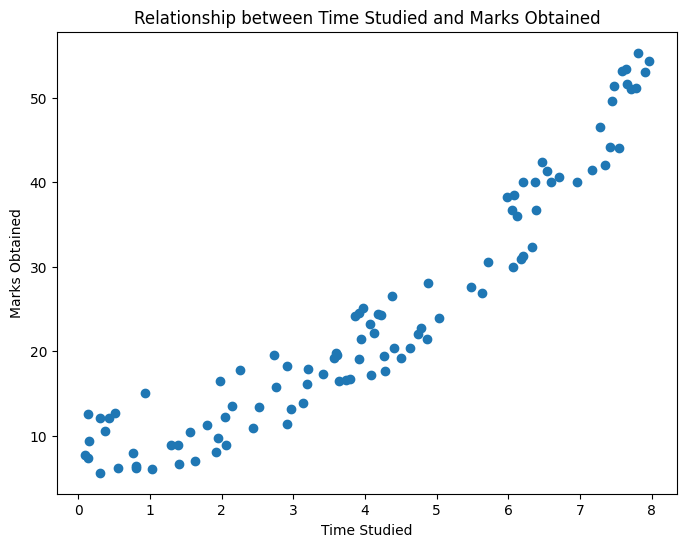

In [7]:
# prompt: make a graph of how marks are increasing and decreasing from time_study

plt.figure(figsize=(8, 6))
plt.scatter(data['time_study'], data['Marks'])
plt.xlabel('Time Studied')
plt.ylabel('Marks Obtained')
plt.title('Relationship between Time Studied and Marks Obtained')
plt.show()


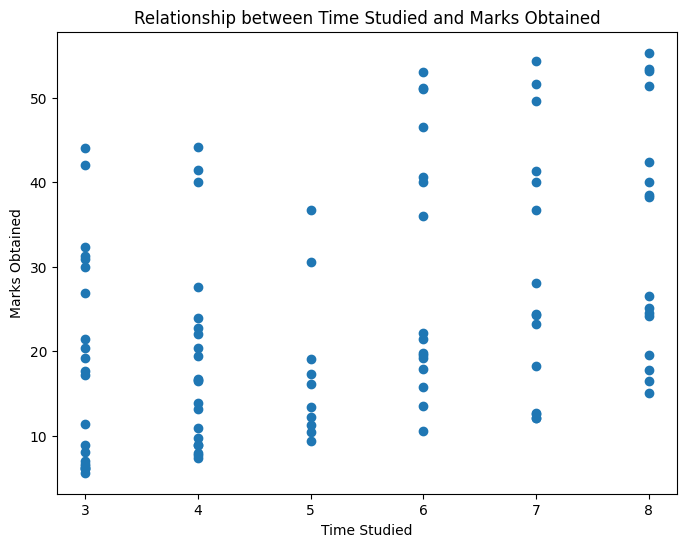

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(data['number_courses'], data['Marks'])
plt.xlabel('Time Studied')
plt.ylabel('Marks Obtained')
plt.title('Relationship between Time Studied and Marks Obtained')
plt.show()

In [9]:
X=data.drop('Marks',axis=1)
y=data['Marks']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
# prompt: Wrap your Keras model using KerasRegressor

from scikeras.wrappers import KerasRegressor

def create_model(neurons=64, layers=1):  # Add parameters for tuning
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))

    for _ in range(layers - 1):  # Add additional layers based on 'layers' parameter
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    return model

# Wrap the Keras model using KerasRegressor
model = KerasRegressor(model=create_model, epochs=150, verbose=0)

# Now you can use 'model' with scikit-learn tools like GridSearchCV


In [24]:
param_grid ={
    'model__neurons': [16, 32, 64, 128],  # Correct prefix for model parameters
    'model__layers': [1, 2],
    'epochs': [50, 100]
}


In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=3,verbose=1)

In [27]:
grid_result = grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
print("Best: %f using %s"% (grid_result.best_score_,grid_result.best_params_))

Best: 0.916187 using {'epochs': 100, 'model__layers': 2, 'model__neurons': 128}
